**About the Analysis:**
The primary purpose of this kernel is to practice and enhance my skills in data analysis. 

This  analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

**About the data:**
(As provided in the overview/description)
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [35]:
## Importing packages
library(tidyverse) 
library(MASS)
library(car)
library(e1071)
library(caret)
library(cowplot)
library(caTools)
library(pROC)
library(ggcorrplot)

#list.files(path = "../input")

ERROR: ignored

In [23]:
telco <- read.csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")

7043 observations with 21 variables.

In [24]:
glimpse(telco)

Rows: 7,043
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fema…
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Y…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, N…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, …
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, …
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes,…
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber …
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No…
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No i…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No i…
$ TechSupport      <fct> No,

**Visualizing NAs in the columns:**

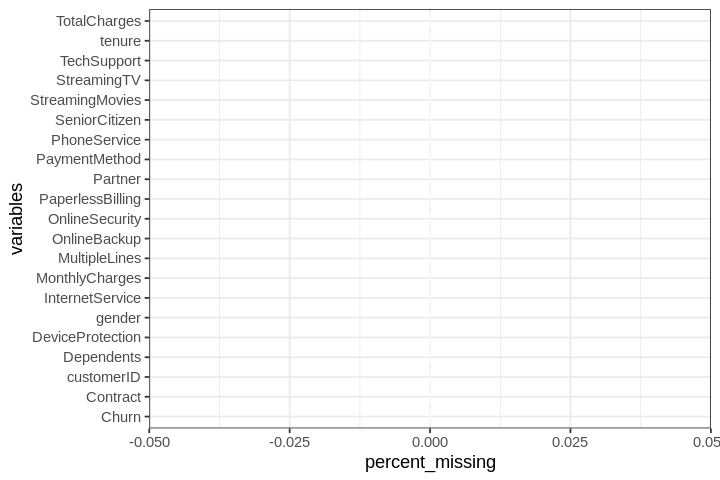

In [36]:
options(repr.plot.width = 6, repr.plot.height = 4)
missing_data <- telco %>% summarise_all(funs(sum(is.na(.))/n()))
missing_data <- gather(missing_data, key = "variables", value = "percent_missing")
ggplot(missing_data, aes(x = reorder(variables, percent_missing), y = percent_missing)) +
geom_bar(stat = "identity", fill = "red", aes(color = I('white')), size = 0.3)+
xlab('variables')+
coord_flip()+ 
theme_bw()

* There are only 11 missing data in the TotalCharges field, so getting rid of those rows from the dataset.
* There are three continuous variables and they are Tenure, MonthlyCharges and TotalCharges. SeniorCitizen is in 'int' form, that can be changed to categorical.

In [37]:
telco <- telco[complete.cases(telco),]

telco$SeniorCitizen <- as.factor(ifelse(telco$SeniorCitizen==1, 'YES', 'NO'))

**EXPLORATORY DATA ANALYSIS:**

In [38]:
theme1 <- theme_bw()+
theme(axis.text.x = element_text(angle = 0, hjust = 1, vjust = 0.5),legend.position="none")
theme2 <- theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),legend.position="none")

In [39]:
glimpse(telco)

Rows: 7,032
Columns: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 9237…
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fema…
$ SeniorCitizen    <fct> NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, NO, …
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No, Y…
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No, N…
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, …
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes, …
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Yes,…
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fiber …
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, No…
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No i…
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No i…
$ TechSupport      <fct> No,

**VISUALIZING THE CATEGORICAL DATA FIRST WITH RESPECT TO CHURN:**

* CHURN columns tells us about the number of Customers who left within the last month. 
* Around 26% of customers left the platform within the last month.

`summarise()` ungrouping output (override with `.groups` argument)



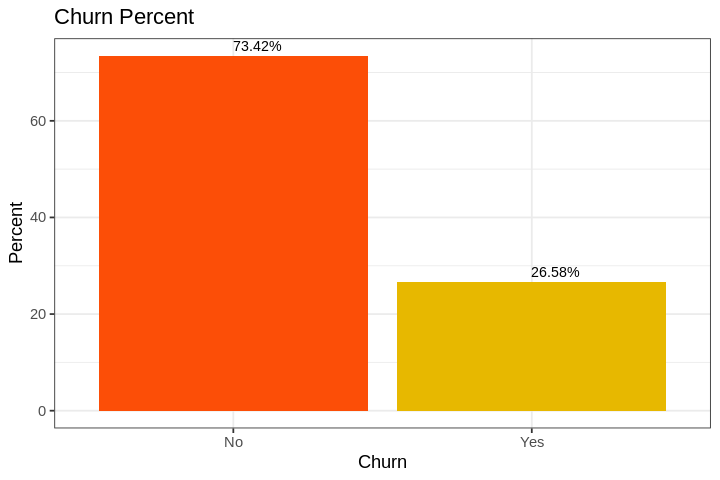

In [40]:
options(repr.plot.width = 6, repr.plot.height = 4)
telco %>% 
group_by(Churn) %>% 
summarise(Count = n())%>% 
mutate(percent = prop.table(Count)*100)%>%
ggplot(aes(reorder(Churn, -percent), percent), fill = Churn)+
geom_col(fill = c("#FC4E07", "#E7B800"))+
geom_text(aes(label = sprintf("%.2f%%", percent)), hjust = 0.01,vjust = -0.5, size =3)+ 
theme_bw()+  
xlab("Churn") + 
ylab("Percent")+
ggtitle("Churn Percent")

* **Gender **- The churn percent is almost equal in case of Male and Females
* The percent of churn is higher in case of **senior citizens**
* Customers with** Partners** and **Dependents** have lower churn rate as compared to those who don't have partners & Dependents.

In [30]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=gender,fill=Churn))+ geom_bar()+ theme1, 
          ggplot(telco, aes(x=SeniorCitizen,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Partner,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=Dependents,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=PhoneService,fill=Churn))+ geom_bar(position = 'fill')+theme1,
          ggplot(telco, aes(x=MultipleLines,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")   

ERROR: ignored

* Churn rate is much **higher** in case of **Fiber Optic InternetServices.**
* Customers who do not have services like **No OnlineSecurity **, **OnlineBackup** and ** TechSupport** have left the platform in the past month.


In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
plot_grid(ggplot(telco, aes(x=InternetService,fill=Churn))+ geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=OnlineSecurity,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=OnlineBackup,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=DeviceProtection,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=TechSupport,fill=Churn))+ geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=StreamingTV,fill=Churn))+ geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")  

* A larger percent of Customers with **monthly subscription** have **left** when compared to Customers with one or two year contract.
* **Churn** percent is** higher** in case of cutsomers having **paperless billing option**.
* Customers who have **ElectronicCheck** PaymentMethod tend to **leave** the platform more when compared to other options.


In [ ]:
plot_grid(ggplot(telco, aes(x=StreamingMovies,fill=Churn))+ 
          geom_bar(position = 'fill')+ theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)), 
          ggplot(telco, aes(x=Contract,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaperlessBilling,fill=Churn))+ 
          geom_bar(position = 'fill')+theme1+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          ggplot(telco, aes(x=PaymentMethod,fill=Churn))+
          geom_bar(position = 'fill')+theme_bw()+
          scale_x_discrete(labels = function(x) str_wrap(x, width = 10)),
          align = "h")  

**Analyzing the three continuous variables w.r.t CHURN:**

**Tenure:** The median tenure for customers who have left is around 10 months.

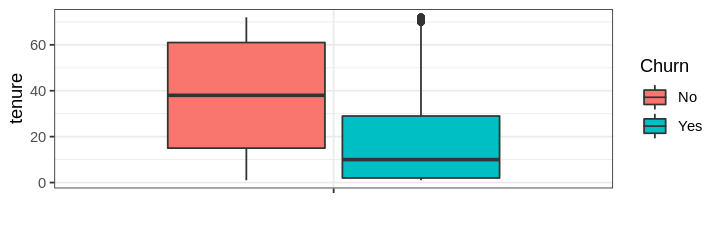

In [31]:
options(repr.plot.width =6, repr.plot.height = 2)
ggplot(telco, aes(y= tenure, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**MonthlyCharges:** Customers who have churned, have high monthly charges. The median is above 75.

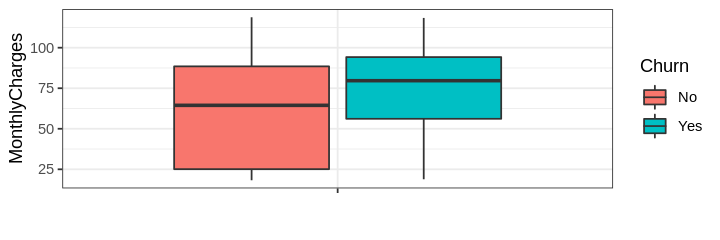

In [32]:
ggplot(telco, aes(y= MonthlyCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**TotalCharges:*** The median Total charges of customers who have churned is low.

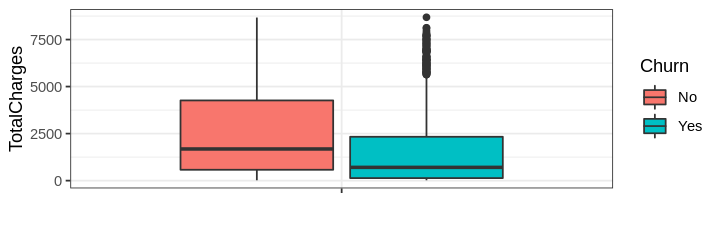

In [33]:
ggplot(telco, aes(y= TotalCharges, x = "", fill = Churn)) + 
geom_boxplot()+ 
theme_bw()+
xlab(" ")

**Checking the correlation between continuous variables**

Total Charges has positive correlation with MonthlyCharges and tenure.

In [41]:
options(repr.plot.width =6, repr.plot.height = 4)
telco_cor <- round(cor(telco[,c("tenure", "MonthlyCharges", "TotalCharges")]), 1)

ggcorrplot(telco_cor,  title = "Correlation")+theme(plot.title = element_text(hjust = 0.5))

ERROR: ignored

Checking for **outliers** in the continuous variables, and it seems none of the values are beyond the whiskers here.

numeric(0)

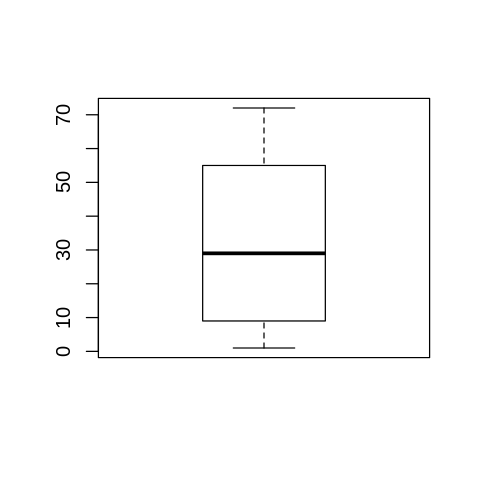

In [44]:
options(repr.plot.width =4, repr.plot.height = 4)
boxplot(telco$tenure)$out

numeric(0)

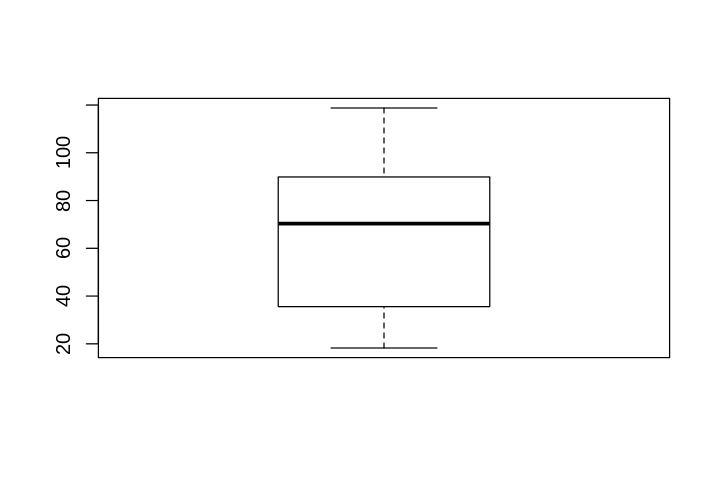

In [42]:
boxplot(telco$MonthlyCharges)$out


numeric(0)

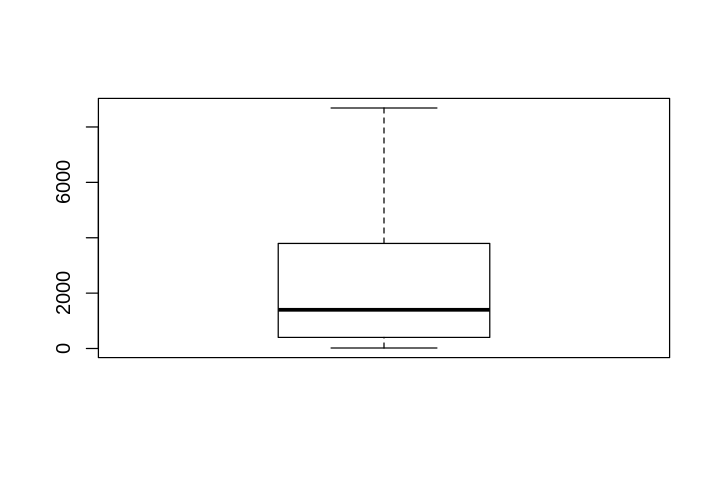

In [43]:
boxplot(telco$TotalCharges)$out

**DATA PREPARATION: **
* Cleaning the Categorical features
* Standardising Continuous features
* Creating derived features
* Creating dummy variables for factor variables
* Creating the final dataset
* Splitting the data into train and validation set.

*Cleaning the Categorical features*

From the EDA above, we know that there are some categorical features that have 'No' and 'No Internet Service' or 'No Phone Service' as a category, we can make them as 'No' and clean these features.

In [45]:
telco <- data.frame(lapply(telco, function(x) {
                  gsub("No internet service", "No", x)}))

telco <- data.frame(lapply(telco, function(x) {
                  gsub("No phone service", "No", x)}))

*Standardising Continuous features*

In [46]:
num_columns <- c("tenure", "MonthlyCharges", "TotalCharges")
telco[num_columns] <- sapply(telco[num_columns], as.numeric)

telco_int <- telco[,c("tenure", "MonthlyCharges", "TotalCharges")]
telco_int <- data.frame(scale(telco_int))


*Creating derived features*

I am trying to create a derived feature from tenure, where i have made different bins of tenure(which is in months) such as '0-1 year', '2-3 years', '3-4 years' etc.

In [47]:
#max(telco$tenure)
#min(telco$tenure)
telco <- mutate(telco, tenure_bin = tenure)

telco$tenure_bin[telco$tenure_bin >=0 & telco$tenure_bin <= 12] <- '0-1 year'
telco$tenure_bin[telco$tenure_bin > 12 & telco$tenure_bin <= 24] <- '1-2 years'
telco$tenure_bin[telco$tenure_bin > 24 & telco$tenure_bin <= 36] <- '2-3 years'
telco$tenure_bin[telco$tenure_bin > 36 & telco$tenure_bin <= 48] <- '3-4 years'
telco$tenure_bin[telco$tenure_bin > 48 & telco$tenure_bin <= 60] <- '4-5 years'
telco$tenure_bin[telco$tenure_bin > 60 & telco$tenure_bin <= 72] <- '5-6 years'

telco$tenure_bin <- as.factor(telco$tenure_bin)

After checking the distribution of data in each tenure bin, we found that maximum number of customers have a tenure of either 0-1 years and followed by 5-6 years.

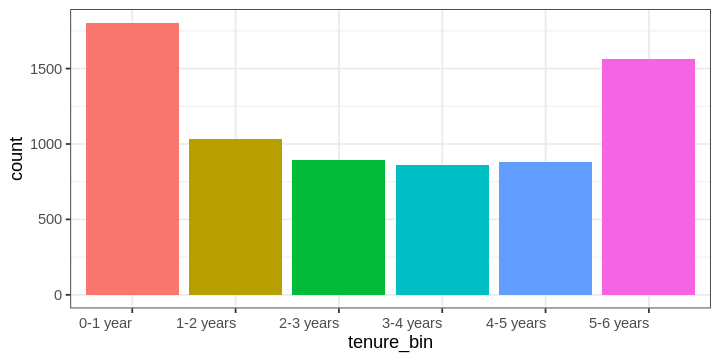

In [48]:
options(repr.plot.width =6, repr.plot.height = 3)
ggplot(telco, aes(tenure_bin, fill = tenure_bin)) + geom_bar()+ theme1

*Creating Dummy Variables*

In [49]:
telco_cat <- telco[,-c(1,6,19,20)]

#Creating Dummy Variables
dummy<- data.frame(sapply(telco_cat,function(x) data.frame(model.matrix(~x-1,data =telco_cat))[,-1]))

head(dummy)

ERROR: ignored

*Creating the final dataset by combining the numeric and dummy data frames.*

In [50]:
#Combining the data
telco_final <- cbind(telco_int,dummy)
head(telco_final)

ERROR: ignored

*Splitting the data into train and validation data.*

In [53]:
#Splitting the data
set.seed(123)
indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

ERROR: ignored

**MODEL BUILDING 1**

**Starting with Logistic Regression**

In [52]:
#Build the first model using all variables
model_1 = glm(Churn ~ ., data = train, family = "binomial")
summary(model_1) 

ERROR: ignored

Using stepAIC for variable selection, which is a iterative process of adding or removing variables, in order to get a subset of variables that gives the best performing model.

In [ ]:
model_2<- stepAIC(model_1, direction="both")

In [ ]:
summary(model_2)

We can use variance inflation factor (vif) to get rid of redundant predictors or the variables that have high multicollinearity between them. Multicollinearity exists when two or more predictor variables are highly related to each other and then it becomes difficult to understand the impact of an independent variable on the dependent variable.

The Variance Inflation Factor(VIF) is used to measure the multicollinearity between predictor variables in a model. A predictor having a VIF of 2 or less is generally considered safe and it can be assumed that it is not correlated with other predictor variables. Higher the VIF, greater is the correlation of the predictor variable w.r.t other predictor variables. However, Predictors with high VIF may have high p-value(or highly significant), hence, we need to see the significance of the Predictor variable before removing it from our model.  

In [ ]:
vif(model_2)

In [ ]:
#Removing DeviceProtection due to high p-value 
model_3 <-glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport + 
    StreamingTV + Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.years + 
    tenure_bin.x5.6.years, family = "binomial", data = train)
summary(model_3)
vif(model_3)

In [54]:
#Removing StreamingTV  as it has high p-value 

model_4 <- glm(formula = Churn ~ tenure + MonthlyCharges + SeniorCitizen + 
    Partner + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity + OnlineBackup + TechSupport +  
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1.2.years + 
    tenure_bin.x5.6.years, family = "binomial", data = train)

summary(model_4)
vif(model_4)

ERROR: ignored

Model_3 all has significant variables, so let's just use it for prediction first

In [ ]:
final_model <- model_3

**Model Evaluation using the validation data:**

In [ ]:
pred <- predict(final_model, type = "response", newdata = validation[,-24])
summary(pred)
validation$prob <- pred

# Using probability cutoff of 50%.

pred_churn <- factor(ifelse(pred >= 0.50, "Yes", "No"))
actual_churn <- factor(ifelse(validation$Churn==1,"Yes","No"))
table(actual_churn,pred_churn)

Let's find the Accuracy, Sensitivity, Specificity using 50% cutoff

In [ ]:
cutoff_churn <- factor(ifelse(pred >=0.50, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
accuracy
sensitivity
specificity

As we can see above, when we are using a cutoff of 0.50, we are getting a good accuracy and specificity, but the sensitivity is very less. Hence, we need to find the optimal probalility cutoff which will give maximum accuracy, sensitivity and specificity

In [ ]:
perform_fn <- function(cutoff) 
{
  predicted_churn <- factor(ifelse(pred >= cutoff, "Yes", "No"))
  conf <- confusionMatrix(predicted_churn, actual_churn, positive = "Yes")
  accuray <- conf$overall[1]
  sensitivity <- conf$byClass[1]
  specificity <- conf$byClass[2]
  out <- t(as.matrix(c(sensitivity, specificity, accuray))) 
  colnames(out) <- c("sensitivity", "specificity", "accuracy")
  return(out)
}

In [ ]:
options(repr.plot.width =8, repr.plot.height =6)
summary(pred)
s = seq(0.01,0.80,length=100)
OUT = matrix(0,100,3)

for(i in 1:100)
{
  OUT[i,] = perform_fn(s[i])
} 

plot(s, OUT[,1],xlab="Cutoff",ylab="Value",cex.lab=1.5,cex.axis=1.5,ylim=c(0,1),
     type="l",lwd=2,axes=FALSE,col=2)
axis(1,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
axis(2,seq(0,1,length=5),seq(0,1,length=5),cex.lab=1.5)
lines(s,OUT[,2],col="darkgreen",lwd=2)
lines(s,OUT[,3],col=4,lwd=2)
box()
legend("bottom",col=c(2,"darkgreen",4,"darkred"),text.font =3,inset = 0.02,
       box.lty=0,cex = 0.8, 
       lwd=c(2,2,2,2),c("Sensitivity","Specificity","Accuracy"))
abline(v = 0.32, col="red", lwd=1, lty=2)
axis(1, at = seq(0.1, 1, by = 0.1))

#cutoff <- s[which(abs(OUT[,1]-OUT[,2])<0.01)]


Let's choose a cutoff value of 0.32 for final model, where the three curves for accuracy, specificty and sensitivity meet

In [ ]:
cutoff_churn <- factor(ifelse(pred >=0.32, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
accuracy
sensitivity
specificity


Logistic Regression with a cutoff probability value of 0.32 gives us better values of accuracy, sensitivity and specificity in the validation data. 

**MODEL BUILDING 2**

**Decision Tree**- Splits the data into multiple sets and each set is further split into subsets to arrive at a tree like structure and make a decision. Homogeneity is the basic concept that helps to determine the attribute on which a split should be made. A split that results into the most homogenous subset is often considered better and step by step each attribute is choosen that maximizes the homogeneity of each subset. Further, this homogeneity is measured using different ways such as Gini Index, Entropy and Information Gain.

* **Preparing the Data**

In [ ]:
set.seed(123)
telco_final$Churn <- as.factor(telco_final$Churn)

indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

* **Training the Decision Tree model using all variables & Predicting in the validation data**

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8)
library(rpart)
library(rpart.plot)

#Training
Dtree = rpart(Churn ~., data = train, method = "class")
summary(Dtree)

#Predicting 
DTPred <- predict(Dtree,type = "class", newdata = validation[,-24])

*** Checking the Confusion Matrix**

In [ ]:
confusionMatrix(validation$Churn, DTPred)

The decision tree model (accuracy - 78.1%) gives slightly better accuracy with respect to the logistic regression model (accuracy 75%). The sensitivity is also better in case of Decision tree which is 82.45%. However, the specificity has decreased to 61.38% in case of Decision Tree as compared to logistic regression model. 

**MODEL BUILDING 3:**

**RANDOM FOREST**- Often known as an ensemble of a large number of Decision Trees, that uses bootstrapped aggregation technique to choose random samples from a dataset to train each tree in the forest. The final prediction in a RandomForest is an aggregation of prediction of individual trees. One of the advantages of RandomForest is that, it gives out-of-bag(OOB) error estimates, which is the mean prediction error on a training sample, using the trees that do not have that training sample in their bootstrap sample. It may act as a cross validation error and eliminate the need of using test/validation data, thereby increasing the training the data. However, I am still going to use train and validation concept here as well, like I did in the above two Models.

In [ ]:
library(randomForest)
set.seed(123)
telco_final$Churn <- as.factor(telco_final$Churn)

indices = sample.split(telco_final$Churn, SplitRatio = 0.7)
train = telco_final[indices,]
validation = telco_final[!(indices),]

The OOB error estimate comes to around 20.87%, so the model has around 79% out of sample accuracy for the training set. Let's check the prediction and accuracy on our validation data.

In [ ]:
#Training the RandomForest Model

model.rf <- randomForest(Churn ~ ., data=train, proximity=FALSE,importance = FALSE,
                        ntree=500,mtry=4, do.trace=FALSE)
model.rf

The basic RandomForest model gives an accuracy of 78.86%( almost close enough to the OOB estimate),  Sensitivity 82.46% and Specificity 63.99%.,

In [ ]:
#Predicting on the validation set and checking the Confusion Matrix.
testPred <- predict(model.rf, newdata=validation[,-24])
table(testPred, validation$Churn)

confusionMatrix(validation$Churn, testPred)

*Variable Importance Plot:*

Below is the variable importance plot, that shows the most significant attribute in decreasing order by mean decrease in Gini. The Mean decrease Gini measures how pure the nodes are at the end of the tree. Higher the Gini Index, better is the homogeneity.

In [ ]:
#Checking the variable Importance Plot
varImpPlot(model.rf)

**Checking the AUC for all three models:**

I have referred this http://rstudio-pubs-static.s3.amazonaws.com/277278_427ca6a7ce7c4eb688506efc7a6c2435.html tutorial to make the AUC plots for all three models.

In [ ]:
options(repr.plot.width =10, repr.plot.height = 8)

glm.roc <- roc(response = validation$Churn, predictor = as.numeric(pred))
DT.roc <- roc(response = validation$Churn, predictor = as.numeric(DTPred))
rf.roc <- roc(response = validation$Churn, predictor = as.numeric(testPred))

plot(glm.roc,      legacy.axes = TRUE, print.auc.y = 1.0, print.auc = TRUE)
plot(DT.roc, col = "blue", add = TRUE, print.auc.y = 0.65, print.auc = TRUE)
plot(rf.roc, col = "red" , add = TRUE, print.auc.y = 0.85, print.auc = TRUE)
legend("bottom", c("Random Forest", "Decision Tree", "Logistic"),
       lty = c(1,1), lwd = c(2, 2), col = c("red", "blue", "black"), cex = 0.75)

**A brief Summary of all the models:**

*Logistic Regression:*

* Accuracy   75.59%,
* Sensitivity 75.75%
* Specificity 75.53%

*DecisionTrees:*

* Accuracy   78.1%,
* Sensitivity 82.45%
* Specificity 61.38%


*RandomForest:*

* Accuracy   78.86%,
* Sensitivity 82.46%
* Specificity 63.99%


Now, I have got an idea on how these basic models work. I will try to work on improving the accuracy now.

I have included a derived attribute, in the latest version, only the sensitivity and specificity of the Decision Tree model increased by around 1%.